<a href="https://www.kaggle.com/salmanejaz1/xgboost-task?scriptVersionId=87061399" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#XGBOOST task


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

data = pd.read_csv('../input/superstoredata/US_superstore_data.csv')
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  Postal Code   9994 non-null   int64  
 12  Region        9994 non-null   object 
 13  Product ID    9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  Product Name  9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [2]:
df = pd.DataFrame(data)

# Convert the dictionary into DataFrame 

  
# Remove all columns between column name 'Row ID' to 'Product Name'
df=df.drop(df.loc[:, 'Row ID':'Product Name'].columns, axis = 1)

In [3]:
df

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


In [4]:
# Define X and y
#profit is our label and rest of the columns are our features

X, y = df.iloc[:,1], df.iloc[:,3]

# Instatiate a XGBClassifier 
xgb_clf = xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb_clf.get_params()

#train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.70)


In [5]:
print(df.dtypes)

Sales       float64
Quantity      int64
Discount    float64
Profit      float64
dtype: object


In [6]:
## Set max_depth to be 100
xgb_clf.set_params(n_estimators=100)

# Fit it to the training set
xgb_clf.fit(X_train, y_train)



/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [7]:
# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Calculate the accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.014338112704234745


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

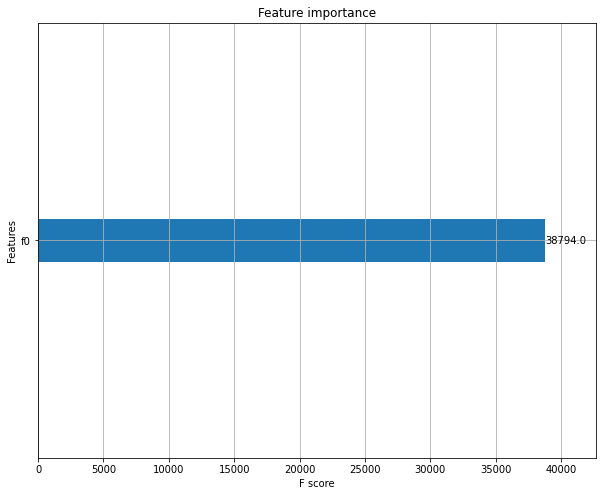

In [8]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

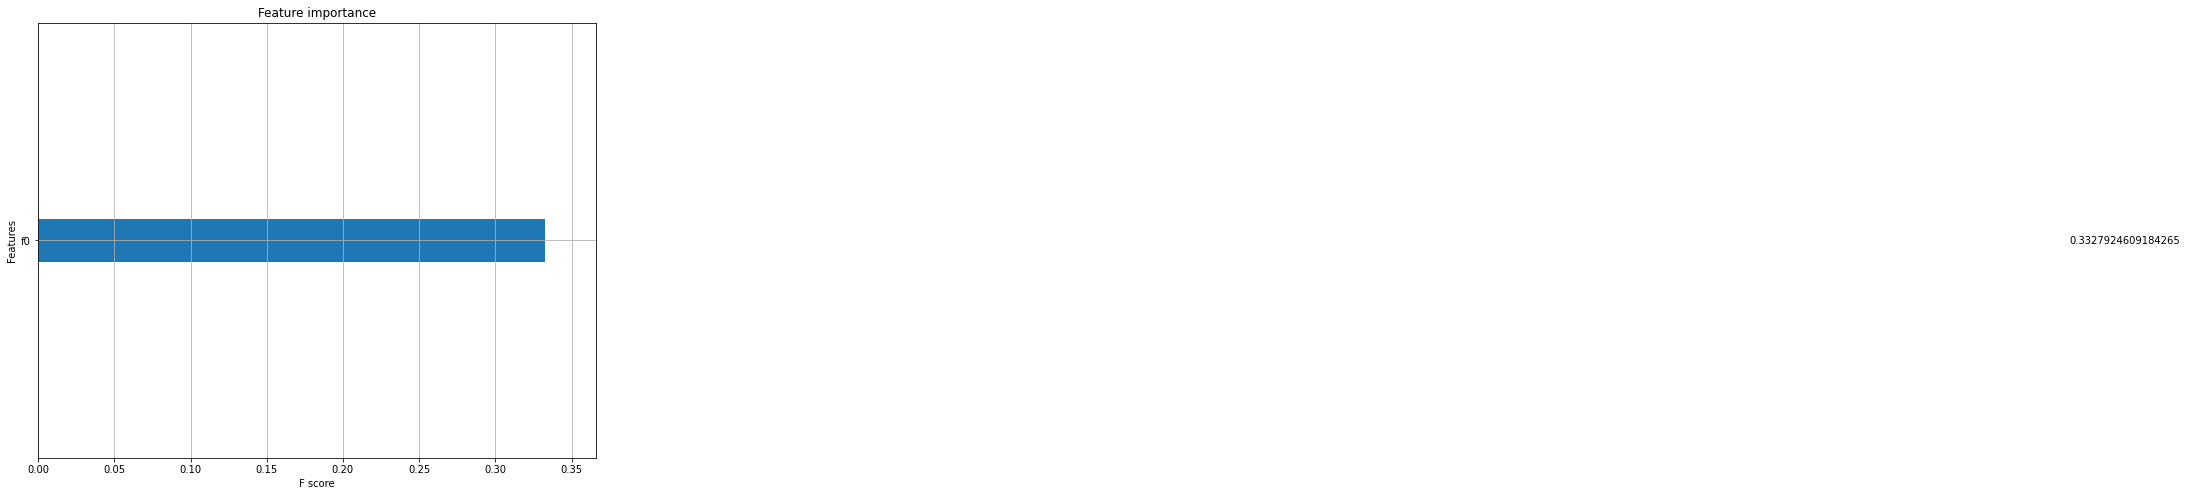

In [9]:
# Plot gain instead of weight
xgb.plot_importance(xgb_clf, importance_type="gain")

In [10]:
X_test


6734    2
3773    3
4673    1
5041    3
6526    5
       ..
9386    4
7663    5
351     1
8611    5
3313    2
Name: Quantity, Length: 2999, dtype: int64

In [11]:
y_test


6734     3.9474
3773     2.3328
4673    33.3172
5041    32.5008
6526    -7.8500
         ...   
9386    37.5624
7663     2.7860
351      1.0668
8611    29.0325
3313    40.1702
Name: Profit, Length: 2999, dtype: float64

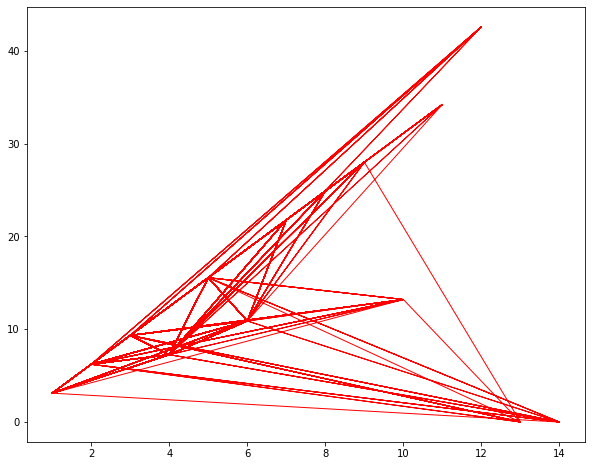

In [12]:
import matplotlib.pyplot as plt
plt.plot(X_test,preds, color='red', linewidth=1)


it is a non linear relation, which can be generalized by xgboost 

<AxesSubplot:>

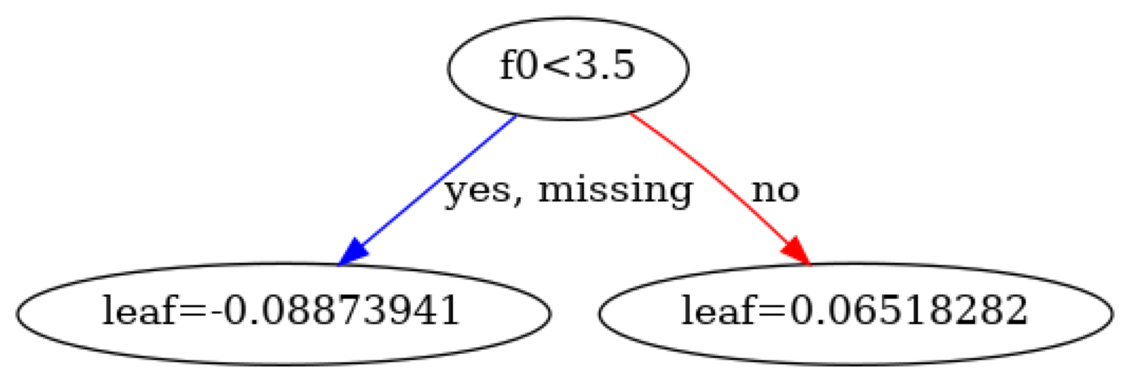

In [13]:
matplotlib.rcParams['figure.figsize'] = (20.0, 8)

# Plot the first tree
xgb.plot_tree(xgb_clf, num_trees=0)